# Exploratory Data Analysis

In [1]:
# import required python packages
# for data handling
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')
%matplotlib inline

import numpy as np
import scipy.stats as st
from utils import QQplot

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# load titanic, tips and airquality datasets from data/titanic.csv, tips.csv and airquality.csv files

titanic = pd.read_csv('data/titanic.csv')
tips = pd.read_csv('data/tips.csv')
airq = pd.read_csv('data/airquality.csv')

In [3]:
tips["day"] = pd.Categorical(tips["day"], categories=["Thur", "Fri", "Sat", "Sun"])

## Introduction

Data in clinical studies are usually stored in spreadsheet programs (like Microsoft Excel) or in relational databases. They are tabular in form with rows representing measurement units (like patients) and columns representing properties (or attributes, variables) of the measurement units. In most of the statistical analyses, we are more interested in summarising, understanding and finding relations between columns. We do not usually try to understand the rows.

The field of statistics, which deals with methods to unerstand, summarise and finding relations in the given data graphically and otherwise is known as **Descriptive Statistics** or **Exploratory Data Analysis**.

It is an exciting field of statistics, in which we explore the unknown and try to find out the structure of given data.

## Data and its type

In the present section, I will use the titanic dataset, as was explained in [10-intro-python.ipynb](10-intro-python.ipynb#titanic-data) notebook. The following depicts the first 5 rows of titanic dataframe.

In [4]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

For the reasons mentioned above, for the sake of present discussion, we will consider a **datum** to be a column of the dataframe. We can appreciate that in general the data comes in the following flavors:

1. **Categorical (unordered) (Nominal)**: This data type contains one of the predefined values. The values have no ordering in them. Like, `Sex`, `Survived` columns in `titanic` dataframe. Both of them can have one of the two values (`male` and `female` for `Sex`; `0` and `1` for `Survived`). `PassengerId` is also this type of data with many possible values without any ordering. We can appreciate that `Survived` and `PassengerId` columns are numbers, but sum, mean, median means nothing in them. They are represented as `factor` in [R language](https://r-project.org) and `pandas.Categorical` with `ordered = False` in `pandas` in python. 

1. **Categorical (ordered) (Ordinal)**: Like before, this data type contains one of predefined values, but the values have underlying rank (or order) in them. Like, `Pclass` variable in the above dataframe has one of the three values (1, 2 and 3), which represents the class of room in the ship. We can say that Class 1 is better that 2 and is better than 3 (so there is a rank and order). It is represented as `factor` in [R language](https://r-project.org) and `pandas.Categorical` with `ordered = True` in `pandas` in python. 

1. **Numerical (discrete)**: This data type contains integer values (which are discrete). Like, count of lytic lesions in skeletal survey in patient of multiple myeloma is a numerical discrete data. It is represented as `int` data in `pandas` in `python`.

1. **Numerical (continuous)**: This is the data which can take values as any real numbers. It has maximum information in it. Like, `Age` and `Fare` columns have data that are numeric and continuous in nature. It is represented as `float` data in `pandas` in `python`.

At the start of data analysis, it is important for us to appreciate the data types of the given data, as it helps us in selecting summary functions and graphical representations. Like, for categorical data, mean, median and standard deviation means nothing. They are only represented in frequency table (as counts or proportions) and mode is the only valid summary depicting centrality.

## Statistical Visualizations

> _The greatest value of a picture is when it forces us to notice what we never expected to see._

> _Numerical quantities focus on expected values, graphical summaries on unexpected values._

**John Tukey**

> _A picture is worth a thousand words._

**Henrik Ibsen**

Graphical representation of data is usually the first step towards understanding it. Making a good and meaningful graph is usually a prerequisite to more formal model building.

Based on the type of data and our requirement, the graphs can usually be classified into:

1. **Relation Visualizations:** scatter plot, line plot.

2. **Distribution Visualizations:** histogram, kernel density estimate (KDE) plot, empirical cumulative distribution function (ECDF) plot, qqplot. Also, includes 2 dimensional histogram and KDE plot.

3. **Categorical Visualizations:** box plot, violin plot, strip plot, point plot.

[Seaborn](https://seaborn.pydata.org), the python plotting package will be used to draw the plots in this narration.

All the above plots can be **subplotted** according to **levels of other categorical variable(s)** based on the following aesthetics:

1. hue of marker/line

1. size of marker/line

1. shape of marker

1. type of line

1. columns and rows **(facetting)**

### Relation visualization

These plots visualize relations of one continuous variable with other continuous variable. There are two types of relational plots: scatter plots (points) and line plots (lines).

#### Scatter plot

We want to establish relation of `total_bill` with `tip` in `tips` dataframe. We will use scatterplot for the same.

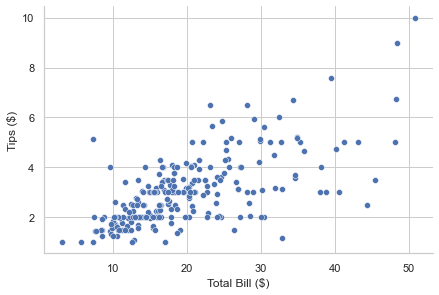

In [5]:
# width = aspect * height
g = sns.relplot(x = 'total_bill', y = 'tip', data = tips, height = 4, aspect = 1.5, kind = 'scatter')
g.ax.set_xlabel('Total Bill ($)')
_ = g.ax.set_ylabel('Tips ($)')

We can see that `total_bill` and `tips` are positively related with each other and variation of the same increases with increasing `total_bill`.

Let us see, if there is any difference in relation among smokers and non smokers.

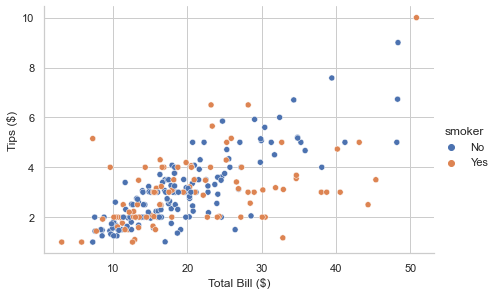

In [6]:
# x vs y conditioned on smoker as hue (colour)
g = sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, height = 4, aspect = 1.5, \
                kind = 'scatter')
g.ax.set_xlabel('Total Bill ($)')
_ = g.ax.set_ylabel('Tips ($)')

Because of lots of overlapping, we donot appreciate the difference between smokers and non smokers. Let us try with facetting (making separate columns for smoker and non smoker)

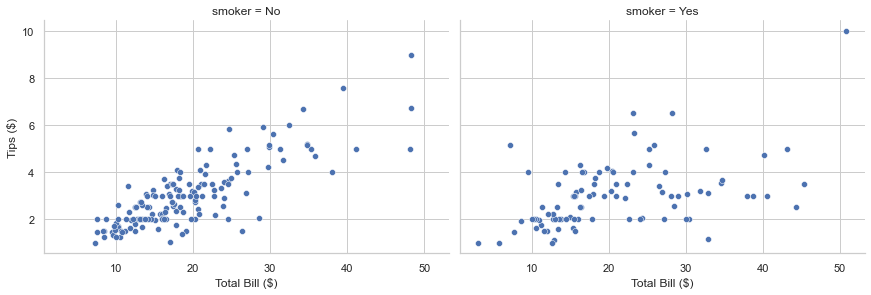

In [7]:
# x vs y conditioned on smoker as column (facetting)
g = sns.relplot(x = 'total_bill', y = 'tip', col = 'smoker', data = tips, height = 4, aspect = 1.5, \
                kind = 'scatter')
g.set_axis_labels('Total Bill ($)', 'Tips ($)')

Now we can better appreciate that in non smokers, the relation is stronger (slope is more and points are more concentrated) than in smokers. We can better appreciate the above, if we plot the regression line on top of the scatterplot.

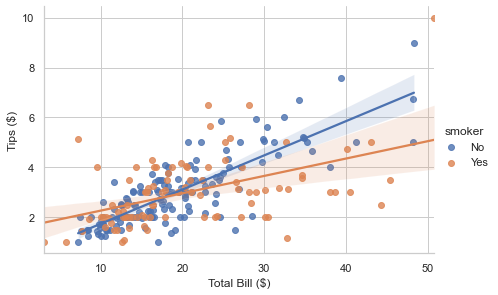

In [8]:
# x vs y conditioned on smoker as hue (color) along with linear regression fit
g = sns.lmplot(x = 'total_bill', y = 'tip', hue = 'smoker', data = tips, height = 4, aspect = 1.5, ci = 95)
_ = g.set_axis_labels('Total Bill ($)', 'Tips ($)')

#### Line plot

Line plots are useful when we want to assess structure of sequence of y values with x values. If we **join** `y` values with **sorted values** of `x`, it is called **line plot**. If we **join** the values of `y` with **rowwise** values of `x`, it is called **path plot**.

We want to assess the relation between temperature (`Temp`) with Ozone (`Ozone`) from `airq` dataframe. 

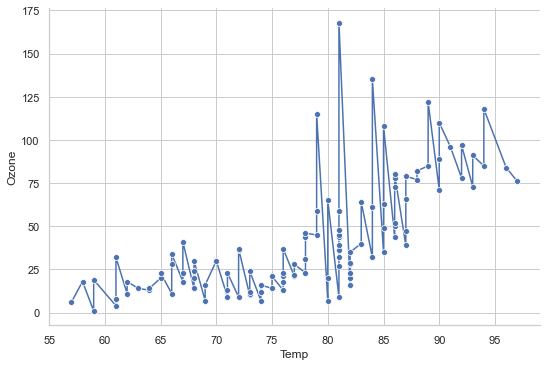

In [9]:
# Line plot. The points are joined with sorted values of temperature
_ = sns.relplot(x = 'Temp', y = 'Ozone', data = airq, kind = 'line', aspect = 1.5, estimator = None, marker = 'o')

We can see that as temperature increases, the ozone also increases non linearly, rate of increases is more after temperature of 80.

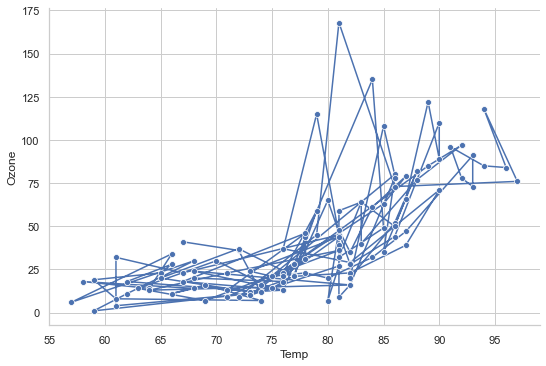

In [10]:
# Path plot. The points are joined with unsorted values of temperature (joining takes place as the points occur)
_ = sns.relplot(x = 'Temp', y = 'Ozone', data = airq, kind = 'line', aspect = 1.5, \
                sort = False, estimator = None, marker = 'o')

Underlying scatter plot is the same, but the joining of lines differ.

Let us analyse whether changing month (`Month`) has any effect of the relation between Temperature and Ozone. We will use a controlling aesthetic (hue) or facetting to see for the difference

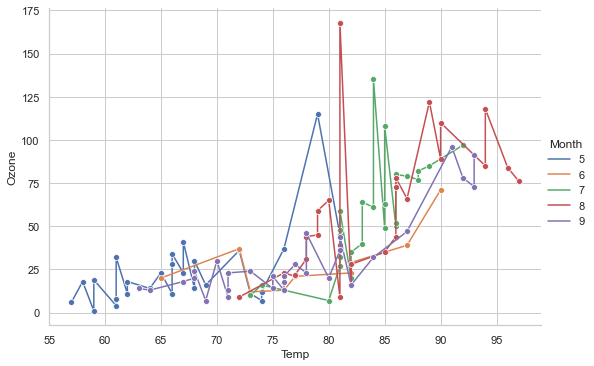

In [11]:
# Line plot. Control by month
_ = sns.relplot(x = 'Temp', y = 'Ozone', hue = 'Month', \
                data = airq.assign(Month = airq.Month.astype('category')), \
                kind = 'line', aspect = 1.5, estimator = None, marker = 'o')

We are not able to appreciate any difference in relation between temperature and ozone with differing months. we can appreciate it better, if we create facetting with months.

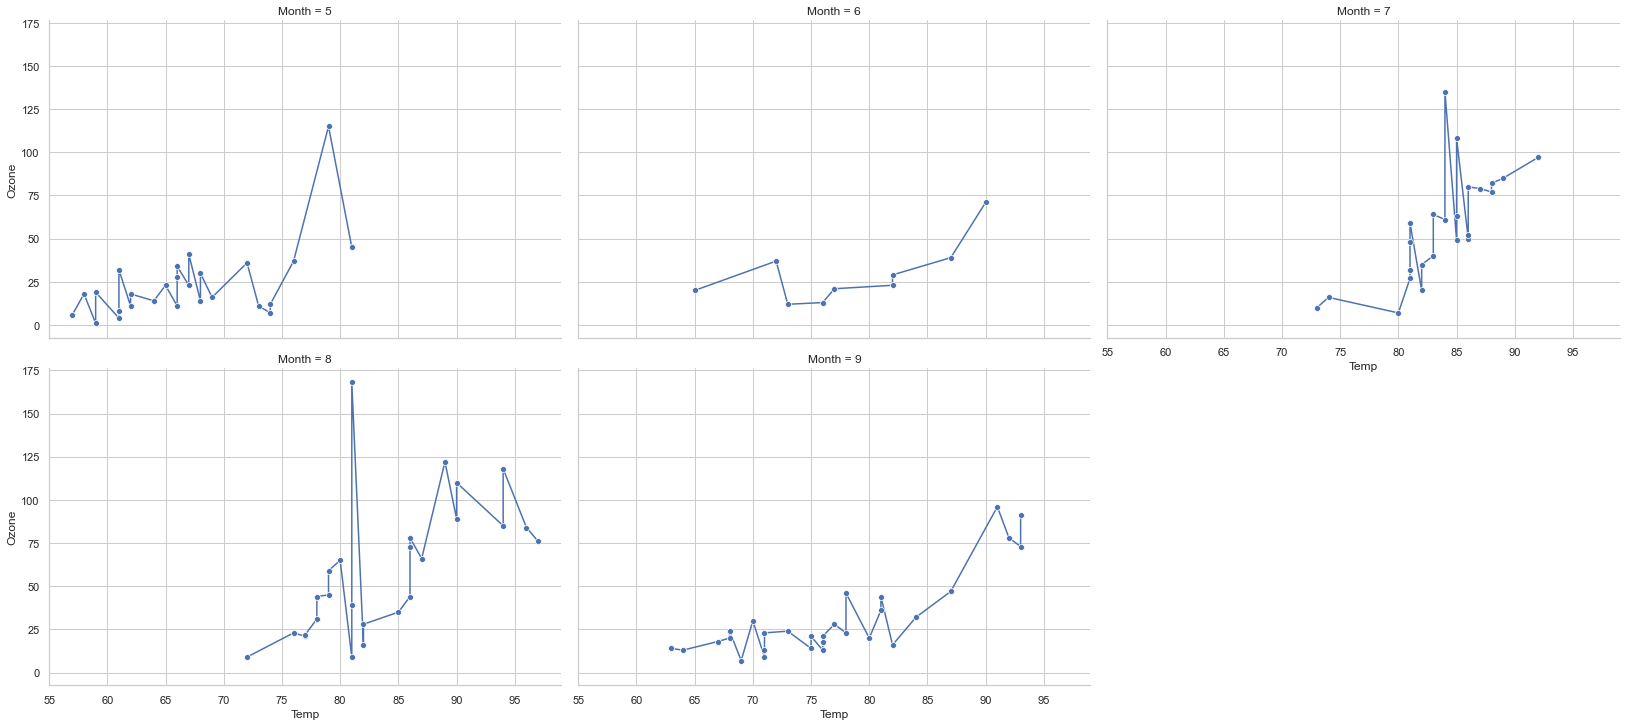

In [12]:
# Line plot. Control by month
_ = sns.relplot(x = 'Temp', y = 'Ozone', col = 'Month', col_wrap = 3, \
                data = airq, kind = 'line', aspect = 1.5, estimator = None, marker = 'o')

Also, we can overlay regression fit line to get the same result. We can see that the relation is non linear. So, we will use LOESS curve for fitting. 

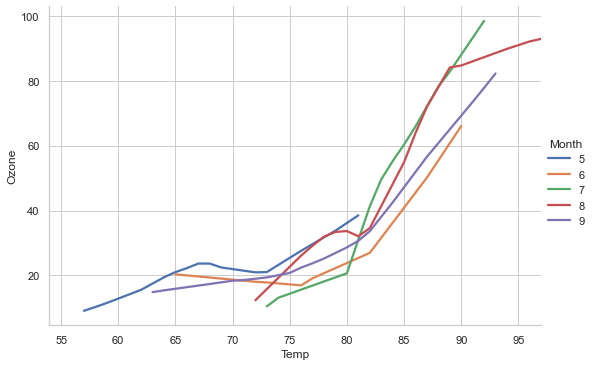

In [13]:
# Line plot. Control by month. LOESS curve fitting
_ = sns.lmplot(x = 'Temp', y = 'Ozone', hue = 'Month', data = airq, lowess = True, aspect = 1.5, scatter = False)

### Distribution visualization

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions. 

1. What **range** do the observations cover? 
1. What is their **central tendency**? 
1. Are they heavily **skewed** in one direction? 
1. Is there evidence for **bimodality**? 
1. Are there significant **outliers**? 
1. Do the answers to these questions **vary across subsets** defined by other variables?

#### Histogram

Histogram is the commonest way to assess the distribution of any continuous data.

We want to visualize the distribution of `Age` of passengers in `titanic` dataframe.

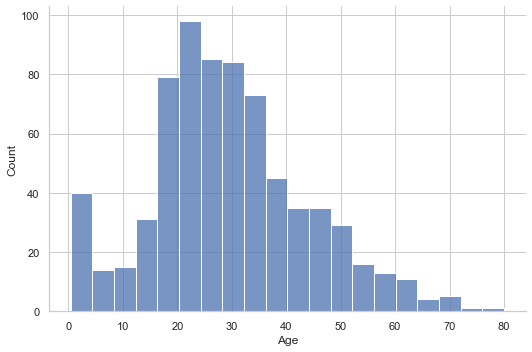

In [14]:
sns.displot(x = 'Age', data = titanic, kind = 'hist', aspect = 1.5)

We can appreciate that the distribution is right skewed and also, that there is significantly large proportion of children below 5 years of age amongst the passengers.

Now let us try to see any difference between male and females.

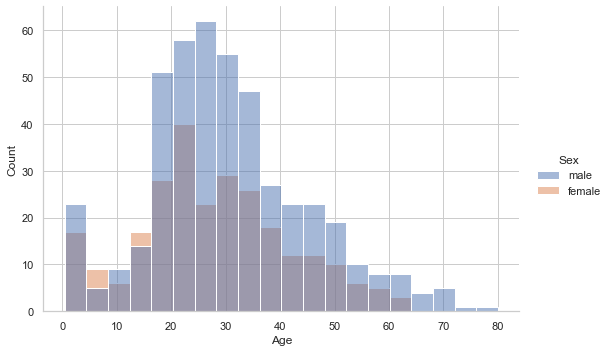

In [15]:
sns.displot(x = 'Age', hue = 'Sex', data = titanic, kind = 'hist', stat = 'count', aspect = 1.5, \
            multiple = 'layer')

Again there is no apparent difference in distribution of age between males and females.

The equivalent plots can be shown as density plots.

#### Density Plot

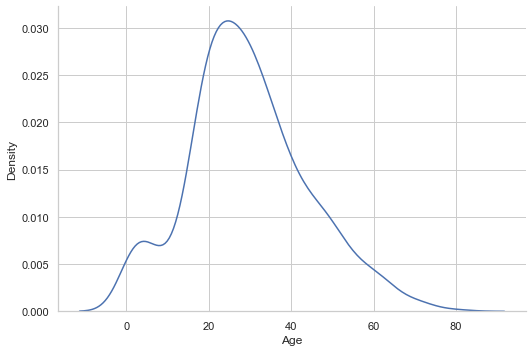

In [16]:
sns.displot(x = 'Age', data = titanic, kind = 'kde', aspect = 1.5)

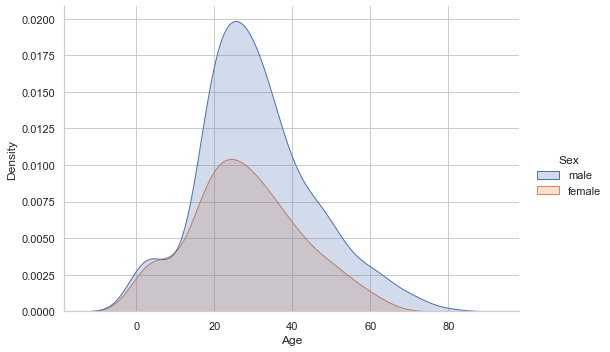

In [17]:
sns.displot(x = 'Age', hue = 'Sex', data = titanic, kind = 'kde', aspect = 1.5, fill = True)

#### QQ plot: comparing with normal distribution

QQplot is an important plot with a statistician which enables him to compare a datum against a known probability distribution, usually normal distribution. It is used to check for any skewness and nature of tails.

Following are the plots of data from normal distribution, t distribution (wide tail) and exponential distribution (right skewed) against normal distribution. 

In [18]:
# Following code is for creating simulation dataframe
N = 100    # number of values per distribution
seed = 124   # random seed, set so that same values are obtained

df_t = 2   # degree of freedom for t distribution, smaller the value, wider the tails
lambda_e = 0.5   # rate parameter for exponential distribution, lower the values, higher the rithe skew

# labels of distributions
dists = np.array(['std normal', f't (df = {df_t})', f'exponential (lambda = {lambda_e})'])

# random values for standard normal, t and exponential distributions
rv_norm = st.norm.rvs(size = N, random_state = seed)
rv_t = st.t.rvs(df = df_t, size = N, random_state = seed)
rv_exp = st.expon.rvs(scale = 1 / lambda_e, size = N, random_state = seed)

# Creating the container dataframe
# numpy.repeat: repeats elements of dists N times
# numpy.hstack: concatenate list of arrays into a single array
df_dists = pd.DataFrame({'dists': np.repeat(dists, N), 'values': np.hstack([rv_norm, rv_t, rv_exp])})

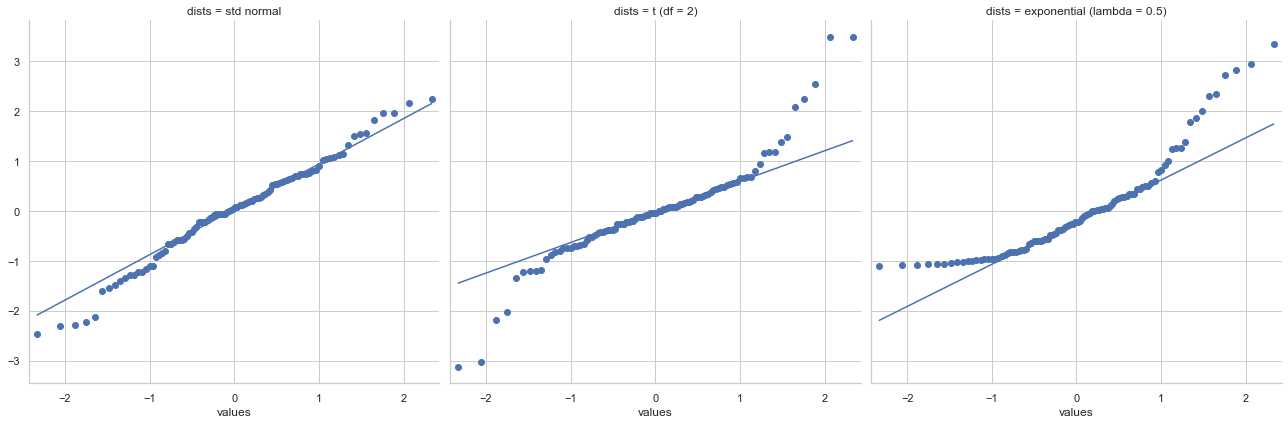

In [19]:
qq_facet = sns.FacetGrid(data=df_dists, col = 'dists', height = 6)
qq_facet.map(QQplot, 'values', dist = st.norm, fit = True, line = 'q')

The above plot is an informative plot. 

For **normal distribution**, the points fall in a straight path **along with the line**.

For **t distribution (wide tail)**, the **right tail of points is below** and **left tail of points is above** the line.

For **exponential distribution (right skew)**, the **tails of point are above** the line. 

#### Distribution of Age of passengers in titanic dataframe

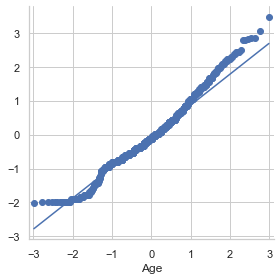

In [20]:
qq_age = sns.FacetGrid(data = titanic.loc[~ titanic.Age.isna(), :], height = 4)
qq_age.map(QQplot, "Age", fit = True, line = 'q')

**Age is skewed to right**

#### Distribution of tip in tips dataframe

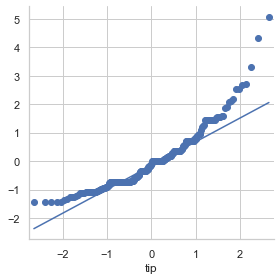

In [21]:
qq_tip = sns.FacetGrid(data = tips, height = 4)
qq_tip.map(QQplot, "tip", fit = True, line = 'q')

**Again the distribution is skewed**.

[**We transform right skewed data by taking logarithm to make it normally distributed**]{#logtr}, as shown below

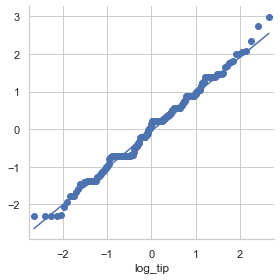

In [22]:
qq_tip = sns.FacetGrid(data = tips.assign(log_tip = np.log(tips.tip)), height = 4)
qq_tip.map(QQplot, "log_tip", fit = True, line = 'q')

### Categorical visualization

The following plots are used to visualize characters of numerical variable (in y axis) according to one or more categorical variables (depicted in x axis and different colors). Following are the common types of plots.

#### Categorical scatter plots

Scatter plot (**strip plot**) depicting `total_bill` according to `day` in tip dataframe.

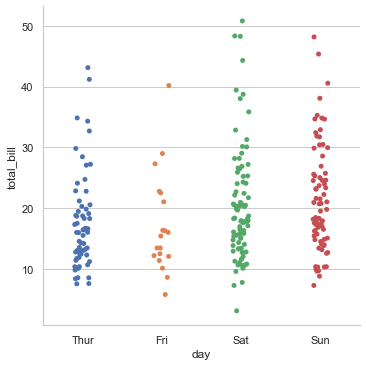

In [23]:
sns.catplot(x="day", y="total_bill", data=tips, kind="strip")

Scatter plot (**swarm plot**) depicting `total_bill` according to `day` in tip dataframe.

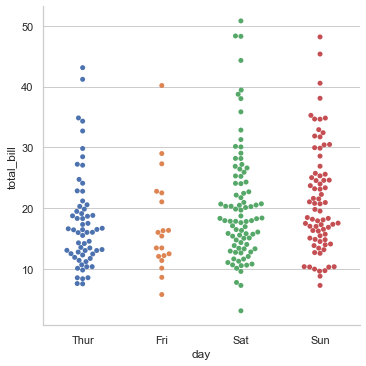

In [24]:
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm")

Scatter plot (**swarm plot**) depicting `total_bill` according to `day` and `sex` in tip dataframe.

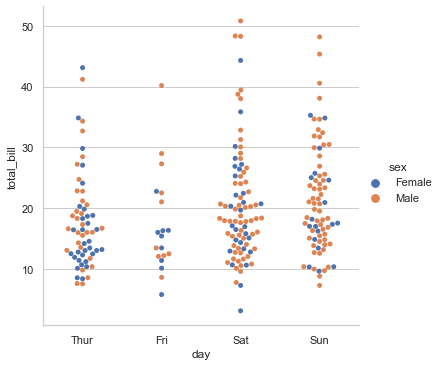

In [25]:
sns.catplot(x="day", y="total_bill", data=tips, hue="sex", kind="swarm")

#### Categorical distributional plots

**Violin plot** is the density plot of a numerical variable with respect to a categorical variable.

**Violin plot** depicting `total_bill` with `day` in `tips` dataframe below.

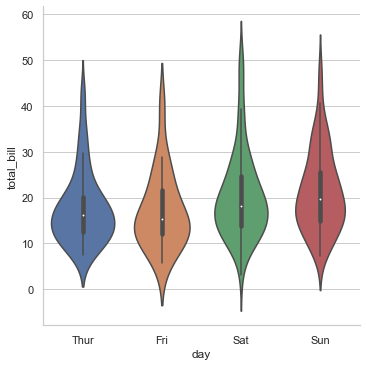

In [26]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin")

**Split Violin plot** depicting `total_bill` with `day` and `sex` in `tips` dataframe below.

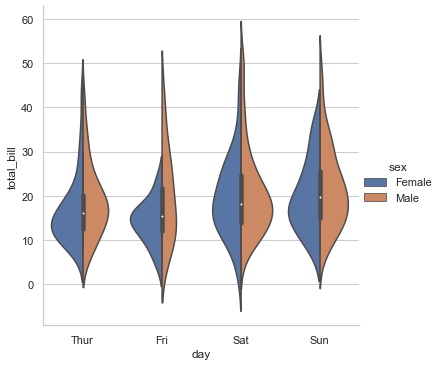

In [27]:
sns.catplot(x="day", y="total_bill", hue = 'sex', data=tips, kind="violin", split = True)

Same relationship, this time with a **boxplot**.

The **box shows the quartiles** of the
dataset while the **whiskers extend to show the rest of the distribution**,
except for **points** that are determined to be **outliers** using a method
that is a function of the inter-quartile range.

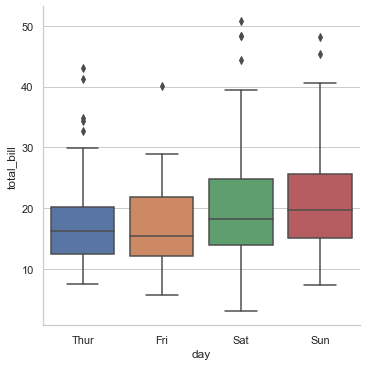

In [28]:
sns.catplot(x="day", y="total_bill", data=tips, kind="box")

Again same relation, but with a **point plot** depicting mean and 95% confidence interval.

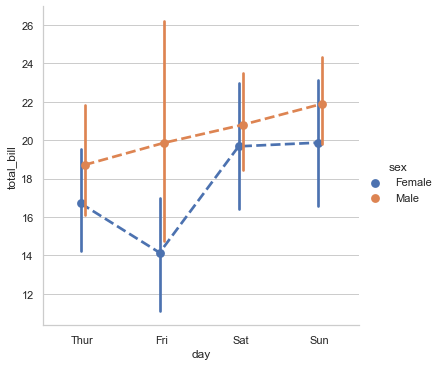

In [29]:
sns.catplot(x="day", y="total_bill", data=tips, hue="sex", kind="point", dodge=True, linestyles = '--')

#### Count plots

These plots depicts count of various levels of a categorical variable, with the same facilities for additional details depiction with facetting and hue, etc.

We want to depict count of `day` in `tips` dataframe.

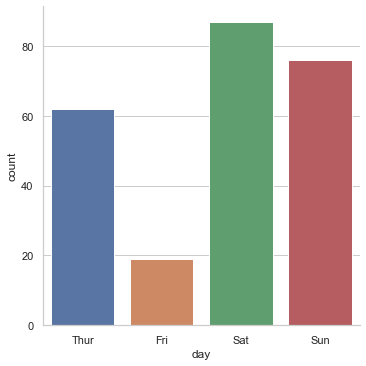

In [30]:
sns.catplot(x = 'day', data = tips, kind = 'count')

Two dimensional count plot between `day` and `sex` (**Mosaic plot**)

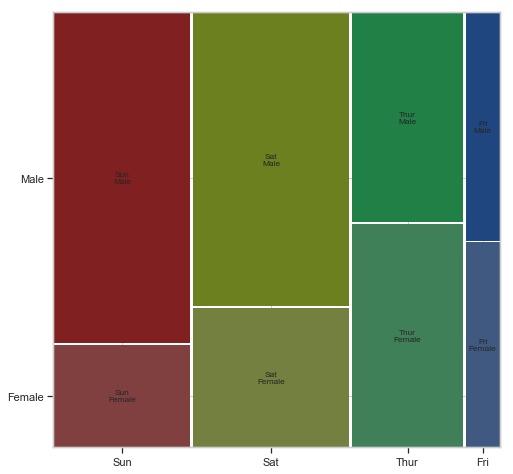

In [31]:
f, ax = plt.subplots(figsize = (8, 8))
_ = mosaic(data = tips, index = ['day', 'sex'], ax = ax)

There are numerous other forms of visualization in statistics. [R](https://www.r-project.org/) package, [ggplot2](https://ggplot2.tidyverse.org/) and its python equivalent [plotnine](https://plotnine.readthedocs.io/en/stable/) present an intuitive framework for data visualisation using [Grammer of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=as_li_ss_tl). It is worth exploring it.

Go through [Do’s and don’ts of making effective graphics](https://stat545.com/effective-graphs.html) by [Jenny Bryan](https://jennybryan.org/). It is an excellent read

## Data Summary

Subdividing a data based on some groups, calculating summary statistics out of them and comparing them between the groups are essential component of data analyses and statistics.

When we summarise a data, we compress whole datum into a single number (summary statistics), which makes it easy to understand.

Broadly speaking, there are two types of data summary statistics:

1. **Measures of centrality**: mean, median, mode.

2. **Measures of dispersion**: standard deviation (variance), interquartile range (IQR), range.

There are also following statistics:

3. **Measures of skewness**

4. **Measures of kurtosis**

### Understanding rank statistics

In [32]:
N = 20
seed = 123
x_exp = pd.Series(st.expon.rvs(loc = 10, scale = 5, size = N, random_state = seed))
x_norm = pd.Series(st.norm.rvs(loc = 10, scale = 5, size = N, random_state = seed))

df_exp = pd.DataFrame({'x': x_exp}).assign(x_rank = x_exp.rank())

df_norm = pd.DataFrame({'x': x_norm}).assign(x_rank = x_norm.rank())

df_all = pd.merge(df_norm, df_exp, on = 'x_rank').\
            rename(columns = {'x_x': 'x_norm', 'x_rank': 'rank', 'x_y': 'x_exp'})

df_all = df_all.sort_values(by = 'rank')

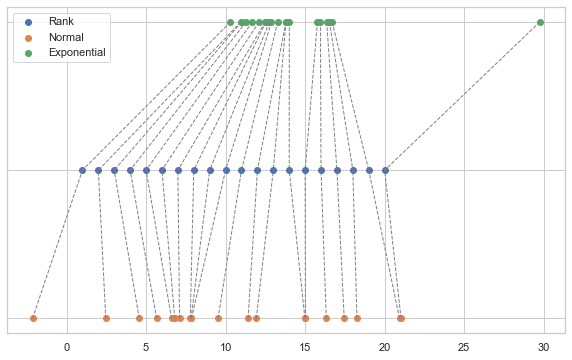

In [33]:
f, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df_all['rank'], np.repeat([1], df_all.shape[0]), label = 'Rank')
ax.scatter(df_all['x_norm'], np.repeat([0], df_all.shape[0]), label = 'Normal')
ax.scatter(df_all['x_exp'], np.repeat([2], df_all.shape[0]), label = 'Exponential')

for i, (x_n, r, x_e) in df_all.iterrows():
    ax.plot([x_n, r], [0, 1], color = 'gray', linestyle = 'dashed', linewidth = 1)
    ax.plot([x_e, r], [2, 1], color = 'gray', linestyle = 'dashed', linewidth = 1)

ax.set_yticks((0, 1, 2))
ax.set_yticklabels("")

_ = plt.legend()

In the above graph, it can be seen that the bottom series of dots (red colored, normal distribution) and top series of dots (green colored, exponential distribution) contain irregular spacing of data points and also few outliers. Middle row shows the rank (1st, 2nd, 3rd, ... position) transformation of the top and bottom points.

It can be appreciated that the middle points (ranks) have made the distribution uniformly spaced with no outlier.

Ranks make a datum uniformly spaced and makes them resistant to outliers.

`median`, `quantile`, `min` and `max` are **rank statistics**.

`median`, IQR are robust to skewed data and to outliers.

### Characters of right skewed data

In [34]:
N = 1000
seed = 123
x_skew = st.expon.rvs(scale = 5, size = N, random_state = seed)
summ_skew = pd.Series(x_skew).describe()

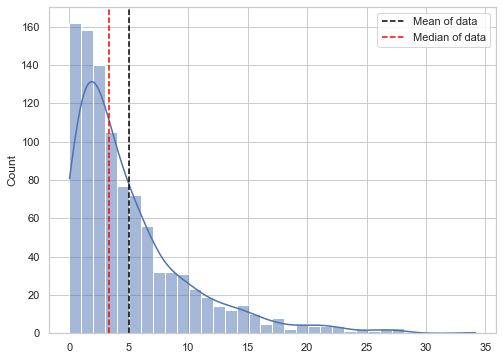

In [35]:
f, ax = plt.subplots(figsize = (8, 6))
sns.histplot(x = x_skew, ax = ax, kde = True)
ax.axvline(np.mean(x_skew), color = 'black', linestyle = 'dashed', label = 'Mean of data')
ax.axvline(np.median(x_skew), color = 'red', linestyle = 'dashed', label = 'Median of data')
_ = plt.legend()

**1. The right skewed data will have mean greater than median**

<hr>

In [36]:
print('Median - 1st quartile: {:.2f} < 3rd quartile - median: {:.2f}'.\
      format(summ_skew['50%'] - summ_skew['25%'], \
      summ_skew['75%'] - summ_skew['50%']))

Median - 1st quartile: 1.82 < 3rd quartile - median: 3.34


**2. Distance between 3rd quartile and median is more than distance between median and 1st quartile**

<hr>

### Measures of centrality

Measures of centrality depicts the **average** or **typical** value of the datum. These aim to show a single value which can substitute for the whole datum. 

#### Mean (Value based)

- Arithmetic mean is calculated by adding all the values and dividing by the number of values of the datum.

- It uses all the values of the datum, so it is sensitive to outliers. Few outliers can pull the mean towards them, although they may not be the typical value.

- It is the best (most efficient) measure of centrality, subject to the absence of outliers.

In [37]:
# Arithmetic mean of age of passengers in titanic
titanic['Age'].mean()

29.69911764705882

In [38]:
# Arithmetic mean of age of passengers in titanic among males and females
titanic.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

#### Median (Rank based)

- Median is calculated by selecting the middle value of the datum.

- It only uses the central value of the datum, so it is resistant to outliers.

- It is less efficient measure of centrality.

- It can be used only in data which has order.

In [39]:
# Median of age of passengers in titanic
titanic['Age'].median()

28.0

In [40]:
# Median of age of passengers in titanic among males and females
titanic.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

#### Mode

- Mode is the value(s) which is occurs the most in a datum.

- It is a valid measure of centrality for nominal, ordinal and continuous data.

In [41]:
# Mode of age of passengers of titanic
titanic['Age'].mode()

0    24.0
dtype: float64

In [42]:
# Mode of age of passengers of titanic with their gender
titanic.groupby('Sex')['Age'].agg(mode = lambda x: x.mode())

mode
Sex                       
female                24.0
male    [19.0, 25.0, 28.0]

### Measures of variation

These are the measures which depict the **variation of data points** from their centrality (measures of centrality). As for measure of centrality, measures of variation are also of two types: **value based** and **rank based**.

#### Standard Deviation and Variance (Value based)

**Spread of a data point** can be depicted by the **difference between the data point and mean of the data**.

If we add the difference between all data points and the mean of the data, we will get 0. This is because of the way mean is defined. Total of all positive differences and total of all negative differences is equal.

**Mean of square of differences** between all data points with the mean of data gives **variance**. Square root of variance is **standard deviation**. It is **sensitive to outliers**.

**Mean of absolute differences** between all data points with mean of data gives **mean absolute difference (MAD)**. It is **resistant to outliers**.

In [43]:
print(f"Standard deviation of age: {titanic['Age'].std():.3f} years\n"
      f"Variance of age: {titanic['Age'].var():.3f} square years\n"
      f"MAD of age: {titanic['Age'].mad():.3f} years")
# Note unit of variance. It is square of unit of standard deviation and MAD

Standard deviation of age: 14.526 years
Variance of age: 211.019 square years
MAD of age: 11.323 years


In [44]:
# All the above measures, grouped by Sex
titanic.groupby('Sex')['Age'].agg(['std', 'var', 'mad'])

std         var        mad
Sex                                     
female  14.110146  199.096233  11.270416
male    14.678201  215.449579  11.352956

#### Interquartile range (Rank based)

We know, **median** is the middle most value (mid rank, 50<sup>th</sup> percentile) of a given datum.

If we divide the **sorted (arranged) datum** into **100 equal parts**, then **value of datum** in each part depicts **a percentile**. **Value in 1<sup>st</sup> part is 1<sup>st</sup> percentile**, value in 50<sup>th</sup> part is 50<sup>th</sup> percentile, value in 97<sup>th</sup> part is the 97<sup>th</sup> percentile. Percentile is equivalently called as **quantile**.

If we divide the arranged datum into 4 equal parts, then value corresponding to each part is known as **quartile**. **1<sup>st</sup> quartile is 25<sup>th</sup> percentile**, 2<sup>nd</sup> quartile is 50<sup>th</sup> percentile **(median)**, **3rd quartile is 75<sup>th</sup> percentile** and 4th quartile is 100<sup>th</sup> percentile (maximum of datum).

**Difference between 3rd and 1st quartile** is known as **interquartile range (IQR)**.

It is a rank based measure, so is resistant to outliers.

In [45]:
# We will create a function, as there is no such function in pandas
def IQR (x):
    '''
    Calculates IQR of a series (datum)
    '''
    return x.quantile(0.75) - x.quantile(0.25)

In [46]:
# IQR of age and fare in titanic dataframe
titanic.loc[:, ['Age', 'Fare']].agg(IQR)

Age     17.8750
Fare    23.0896
dtype: float64

In [47]:
print('IQR for age: {:.3f}'.format(IQR(titanic.Age)))

IQR for age: 17.875


In [48]:
# IQR of age grouped by gender of passengers
titanic.groupby('Sex')['Age'].agg(IQR)

Sex
female    19.0
male      18.0
Name: Age, dtype: float64

#### Range (Rank based)

**Range** is the **difference between maximum and minimum value** of a datum.

In [49]:
print(f"Range of age of titanic passengers: {titanic['Age'].max() - titanic['Age'].min()} years")

Range of age of titanic passengers: 79.58 years


### Which summary statistics to use?

1. **Continuous data**

    1. **Describing data**: We show measures of centrality and measures of dispersion, both value and rank based to describe the data.

    2. **Compare data between two or more groups**: We show measures of centrality, both value and rank based to compare data between two or more groups.

    3. **For skewed data**: Either we use rank based statistics, or we transform data by taking logarithm.
    
2. **Ordinal data**: We used rank based statistics.

3. **Nominal data**: We use only proportion based statistics (proportion, mode).

## Describing data grouped by a grouping variable

Numerical variables are described by mean, median, standard deviation, 1st and 3rd quartile, minimum and maximum.

The following snippet shows to get the descriptionof numerical variables between survivors and non-survivors in titanic dataframe.

In [50]:
titanic.groupby('Survived')[['Age', 'Fare']].describe().T

Survived             0           1
Age  count  424.000000  290.000000
     mean    30.626179   28.343690
     std     14.172110   14.950952
     min      1.000000    0.420000
     25%     21.000000   19.000000
     50%     28.000000   28.000000
     75%     39.000000   36.000000
     max     74.000000   80.000000
Fare count  549.000000  342.000000
     mean    22.117887   48.395408
     std     31.388207   66.596998
     min      0.000000    0.000000
     25%      7.854200   12.475000
     50%     10.500000   26.000000
     75%     26.000000   57.000000
     max    263.000000  512.329200

Categorical variables are described by counts of levels of variables.

The following snippet shows to get the description of categorical variables between survivors and non-survivors in titanic dataframe.

In [51]:
titanic.groupby('Survived')[['Sex','Pclass', 'SibSp', 'Embarked']].\
apply(lambda gdf: \
      gdf.apply(lambda ser: \
                ser.value_counts())).\
T.stack().fillna(0).assign(total = lambda x: x.loc[:, 0] + x.loc[:, 1])

Survived             0      1  total
Sex      female   81.0  233.0  314.0
         male    468.0  109.0  577.0
Pclass   1        80.0  136.0  216.0
         2        97.0   87.0  184.0
         3       372.0  119.0  491.0
SibSp    0       398.0  210.0  608.0
         1        97.0  112.0  209.0
         2        15.0   13.0   28.0
         3        12.0    4.0   16.0
         4        15.0    3.0   18.0
         5         5.0    0.0    5.0
         8         7.0    0.0    7.0
Embarked C        75.0   93.0  168.0
         Q        47.0   30.0   77.0
         S       427.0  217.0  644.0